<a href="https://colab.research.google.com/github/25stu0501-cell/opencv-25-10-29/blob/main/opencv_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이미지 URL을 입력하세요: https://dimg.donga.com/wps/SPORTS/IMAGE/2025/05/03/131540151.1.png


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


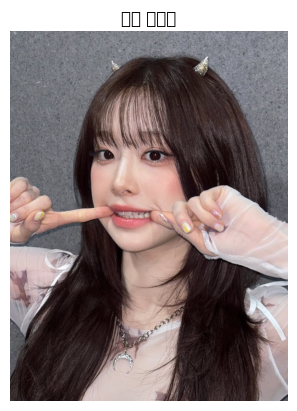

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44404 (\N{HANGUL SYLLABLE GUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

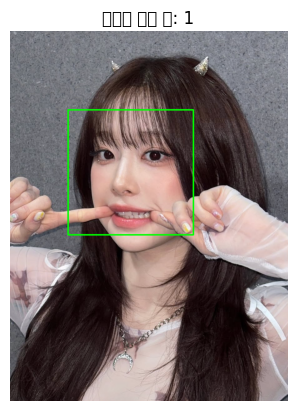

In [1]:
# --- 1. 라이브러리 설치 및 임포트 ---
!pip install opencv-python-headless requests

import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt

# --- 2. 인터넷에서 이미지 다운로드 ---
# 예: 어떤 이미지든 URL 입력 (사용자 입력 가능)
image_url = input("이미지 URL을 입력하세요: ").strip()

# 이미지 요청 및 읽기
response = requests.get(image_url, stream=True)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# --- 3. 이미지 확인 ---
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("원본 이미지")
plt.axis("off")
plt.show()

# --- 4. OpenCV로 간단한 이미지 인식 (예: 얼굴 인식) ---
# 얼굴 인식용 Haar Cascade 불러오기
cascade_url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml"
face_cascade_path = "haarcascade_frontalface_default.xml"
!wget -q {cascade_url} -O {face_cascade_path}

face_cascade = cv2.CascadeClassifier(face_cascade_path)

# 얼굴 검출
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# 얼굴 위치 표시
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

# --- 5. 결과 출력 ---
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"인식된 얼굴 수: {len(faces)}")
plt.axis("off")
plt.show()


opencv를 활용해서 인터넷에서 다운받은 사진을 바탕화면에 이 데이터를 입력받아, 오픈 cv로 이미지 인식이 되는 걸 구글 코랩에서 실행하고싶어 코드를 만들어줘